# A Finite Element Examples: Plate 01

This example is based on the plate01 example distributed with FEM.edu

## Patch test for triangular plate under in-plane loading

The patch test is an empirical minimum test which every finite element has to pass to ensure convergence with mesh refinement.

It consists of a problem for which a known homogeneous solution exists.  For plates, we commonly use a rectangular plate subject to homogenous edge loading, e.g., constant tension in the x-direction, or constant shear, etc.

The mesh must contain distorted elements and at least one element not attached to any node on the boundary.

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.LinearTriangle import *
from femedu.materials.PlaneStress import *

## Build a model

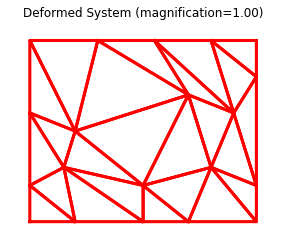

In [11]:
# ========== setting mesh parameters ==============

N = 8         # number of elements in the mesh
Lx = 100.0    # length of plate in the x-direction
Ly =  80.0    # length of plate in the y-direction


# ========== setting material parameters ==============

params = dict(
    E  = 20000.,    # Young's modulus
    nu = 0.250,     # Poisson's ratio
    t  = 1.00       # thickness of the plate
)

# ========== setting load parameters ==============

px  = 1.0         # uniform load normal to x=const
py  = 0.0         # uniform load normal to y=const
pxy = 0.0         # uniform shear load on x=const and y=const

# ========== setting analysis parameters ==============

target_load_level = 1.00     # reference load
max_steps = 2                # number of load steps: 2 -> [0.0, 1.0]

# define a list of target load levels
load_levels = np.linspace(0, target_load_level, max_steps)

#
# ==== Build the system model ====
#

model = System()
model.setSolver(NewtonRaphsonSolver())

# create nodes

nodes = (
    Node(0.0*Lx, 0.0*Ly),  # nd 0
    Node(0.2*Lx, 0.0*Ly),  # nd 1
    Node(0.5*Lx, 0.0*Ly),  # nd 2
    Node(0.7*Lx, 0.0*Ly),  # nd 3
    Node(1.0*Lx, 0.0*Ly),  # nd 4
    #
    Node(0.0*Lx, 0.2*Ly),  # nd 5
    Node(0.15*Lx,0.3*Ly),  # nd 6
    Node(0.5*Lx, 0.2*Ly),  # nd 7
    Node(0.8*Lx, 0.3*Ly),  # nd 8
    Node(1.0*Lx, 0.2*Ly),  # nd 9
    #
    Node(0.0*Lx, 0.6*Ly),  # nd 10
    Node(0.2*Lx, 0.5*Ly),  # nd 11
    Node(0.7*Lx, 0.7*Ly),  # nd 12
    Node(0.9*Lx, 0.6*Ly),  # nd 13
    Node(1.0*Lx, 0.8*Ly),  # nd 14
    #
    Node(0.0*Lx, 1.0*Ly),  # nd 15
    Node(0.3*Lx, 1.0*Ly),  # nd 16
    Node(0.55*Lx,1.0*Ly),  # nd 17
    Node(0.8*Lx, 1.0*Ly),  # nd 18
    Node(1.0*Lx, 1.0*Ly),  # nd 19
)

elements = (
    LinearTriangle(nodes[0],nodes[1],nodes[5],PlaneStress(params)),  # elem 0
    LinearTriangle(nodes[1],nodes[2],nodes[6],PlaneStress(params)),  # elem 1
    LinearTriangle(nodes[2],nodes[3],nodes[7],PlaneStress(params)),  # elem 2
    LinearTriangle(nodes[3],nodes[4],nodes[8],PlaneStress(params)),  # elem 3
    #
    LinearTriangle(nodes[6],nodes[5],nodes[1],PlaneStress(params)),  # elem 4
    LinearTriangle(nodes[7],nodes[6],nodes[2],PlaneStress(params)),  # elem 5
    LinearTriangle(nodes[8],nodes[7],nodes[3],PlaneStress(params)),  # elem 6
    LinearTriangle(nodes[9],nodes[8],nodes[4],PlaneStress(params)),  # elem 7
    #
    LinearTriangle(nodes[5],nodes[6],nodes[10],PlaneStress(params)),  # elem 8
    LinearTriangle(nodes[6],nodes[7],nodes[11],PlaneStress(params)),  # elem 9
    LinearTriangle(nodes[7],nodes[8],nodes[12],PlaneStress(params)),  # elem 10
    LinearTriangle(nodes[8],nodes[9],nodes[13],PlaneStress(params)),  # elem 11
    #
    LinearTriangle(nodes[11],nodes[10],nodes[6],PlaneStress(params)),  # elem 12
    LinearTriangle(nodes[12],nodes[11],nodes[7],PlaneStress(params)),  # elem 13
    LinearTriangle(nodes[13],nodes[12],nodes[8],PlaneStress(params)),  # elem 14
    LinearTriangle(nodes[14],nodes[13],nodes[9],PlaneStress(params)),  # elem 15
    #
    LinearTriangle(nodes[10],nodes[11],nodes[15],PlaneStress(params)),  # elem 16
    LinearTriangle(nodes[11],nodes[12],nodes[16],PlaneStress(params)),  # elem 17
    LinearTriangle(nodes[12],nodes[13],nodes[17],PlaneStress(params)),  # elem 18
    LinearTriangle(nodes[13],nodes[14],nodes[18],PlaneStress(params)),  # elem 19
    #
    LinearTriangle(nodes[16],nodes[15],nodes[11],PlaneStress(params)),  # elem 20
    LinearTriangle(nodes[17],nodes[16],nodes[12],PlaneStress(params)),  # elem 21
    LinearTriangle(nodes[18],nodes[17],nodes[13],PlaneStress(params)),  # elem 22
    LinearTriangle(nodes[19],nodes[18],nodes[14],PlaneStress(params)),  # elem 23
)

model.addNode(*nodes)
model.addElement(*elements)

# define support(s)

fix_x = (0,5,10,15)
fix_y = (0,1,2,3,4)

for idx in fix_x:
    nodes[idx].fixDOF('ux')    # horizontal support left end
for idx in fix_y:
    nodes[idx].fixDOF('uy')          # vertical support right end

# ==== complete the reference load ====

# these are only nodal forces as part of the reference load
# .. load only the upper node

#model.report()

model.plot(filename="plate02_unloaded.png")

## Analyze the model

In [4]:

model.solve(verbose=True)

model.report()


AttributeError: 'LinearTriangle' object has no attribute 'dof_list'

In [ ]:
# create plots

model.plot(factor=1000.0, filename="frame1_deformed.png")

model.beamValuePlot("F", filename="frame1_force.png")
model.beamValuePlot("M", filename="frame1_moment.png")
model.beamValuePlot("V", filename="frame1_shear.png")

## Stability Analysis

In [ ]:
# initialize the analysis:
model.resetDisplacements()   # set U to all zeros
model.initRecorder()         # sets variables to track; 
                             # defaults are load_level and stability index

model.setLoadFactor(0.0)     # define a known equilibrium solution

model.startRecorder()        # this starts the recording of requested variables

model.trackStability(True)   # this adds a stability check every recordThisStep()

# solve for all load_levels
for loadfactor in load_levels:

    # define node X2 as the controled node; downward direction is prescribed:
    model.setLoadFactor(loadfactor)
    model.solve(verbose=True)

    # stability check
    model.recordThisStep()   # run stability check and record history

    print("\n=== next load level ===\n")


In [ ]:
#
# ==== check the current state of the model ===
#

model.report()

In [ ]:
#
# ==== create some nice plots ===
#       
model.plot(factor=1.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")

model.historyPlot('stability')
model.plotBucklingMode(factor=10., filename="frame1_buckling_mode0.png")
